In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import RandomizedSearchCV

sns.set_style('darkgrid')
%matplotlib inline

# Import Data (data with outliers)

In [2]:
data = pd.read_csv('clean-data.csv')
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,...,0,0,0,0,1,1,0,0,0,0
49996,169179,2013-04-09 00:05:17,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2013-02-20 22:41:51,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,1,0,1,0,0,0
49998,324905,2013-04-28 12:33:04,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,...,0,0,0,0,1,1,1,0,0,0


In [3]:
print(list(data.columns))
print(len(list(data.columns)))

['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date', 'liked', 'fo_to_enrolled', 'about', 'accountview', 'addproperty', 'addvehicle', 'adverseactions', 'alerts', 'bankverification', 'boostfriendslist', 'bvplaidlinkcontainer', 'bvstats', 'camerascreen', 'cc1', 'cc1category', 'cc3', 'communityandinvites', 'contactinfoconfirm', 'credit1', 'credit2', 'credit3', 'credit3alerts', 'credit3container', 'credit3cta', 'credit3dashboard', 'credits', 'cycle', 'editprofile', 'employmentinfo', 'employmentsummary', 'finances', 'findfriendscycle', 'forgotpassword', 'groupedinstitutions', 'history', 'home', 'idandselfiecamerascreen', 'identityverification', 'idscreen', 'instantloanssn', 'instantoffercreateaccount', 'institutions', 'joinscreen', 'landingscreen', 'leaderboard', 'listpicker', 'llloanamount', 'loan', 'loan1', 'loan2', 'loan3', 'loan4', 'loanappagreement', 'loanappbankinfo', 'loanappconfirmwithdrawal',

# Data with outliers - No Standardize - No SMOTE

In [4]:
features = data.drop(['user', 'first_open', 'screen_list', 'enrolled_date', 'fo_to_enrolled', 'enrolled'],axis=1)

In [5]:
features = pd.concat([features,data['enrolled']],axis=1)

In [6]:
features

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,about,accountview,addproperty,...,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork,enrolled
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,6,1,24,13,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,19,23,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,1,18,31,32,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
49996,1,0,35,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2,22,39,25,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
49998,6,12,27,26,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


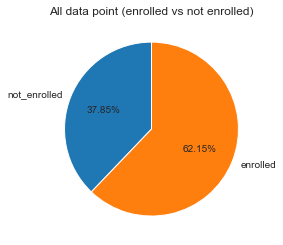

In [7]:
sizes_feat = [len(features[features['enrolled']==0]), len(features[features['enrolled']==1])]
labels = ['not_enrolled', 'enrolled']

plt.title('All data point (enrolled vs not enrolled)')
plt.pie(sizes_feat, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## Train Test Split

In [8]:
X = features.drop('enrolled',axis=1)
y = features['enrolled']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [10]:
y_train.value_counts()

1    21859
0    13141
Name: enrolled, dtype: int64

In [11]:
len(y_train[y_train==1])

21859

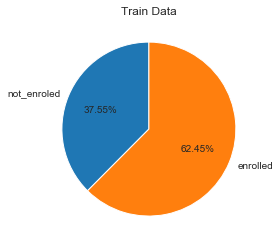

In [12]:
sizes = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['not_enroled', 'enrolled']


plt.title('Train Data')
plt.pie(sizes, labels=labels, autopct='%2.2f%%', startangle=90)

plt.show()

## Modelling

### Logistic Regression

In [13]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred_logreg = logreg.predict(X_test)
proba_logreg = logreg.predict_proba(X_test)

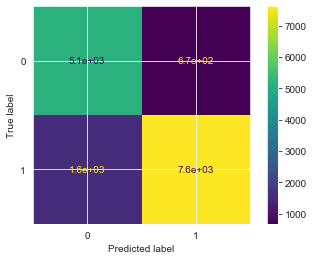

In [16]:
print(plot_confusion_matrix(logreg, X_test, y_test))

In [17]:
print(confusion_matrix(y_test, pred_logreg))

[[5111  674]
 [1592 7623]]


In [18]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5785
           1       0.92      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.86      0.84     15000
weighted avg       0.86      0.85      0.85     15000



In [19]:
print(f'F1 Score : {f1_score(y_test, pred_logreg)}')
print(f'Precision Score : {precision_score(y_test, pred_logreg)}')
print(f'Recall Score : {recall_score(y_test, pred_logreg)}')

F1 Score : 0.8706030150753769
Precision Score : 0.9187658189707123
Recall Score : 0.8272381985892566


In [20]:
proba_logreg[:,1]

array([0.31808153, 0.59339452, 0.99609234, ..., 0.99895169, 0.08138809,
       0.99487239])

### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(logreg, X_test, y_test, cv = 10).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.8461333333333332

### KNN

In [23]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
pred_knn = knn.predict(X_test)
proba_knn = knn.predict_proba(X_test)

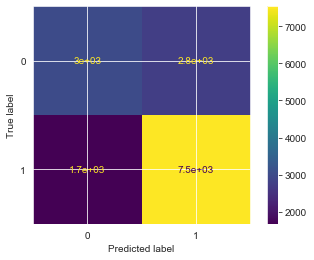

In [26]:
print(plot_confusion_matrix(knn, X_test, y_test))

In [27]:
print(confusion_matrix(y_test, pred_knn))

[[3018 2767]
 [1681 7534]]


In [28]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.52      0.58      5785
           1       0.73      0.82      0.77      9215

    accuracy                           0.70     15000
   macro avg       0.69      0.67      0.67     15000
weighted avg       0.70      0.70      0.70     15000



In [29]:
print(f'F1 Score : {f1_score(y_test, pred_knn)}')
print(f'Precision Score : {precision_score(y_test, pred_knn)}')
print(f'Recall Score : {recall_score(y_test, pred_knn)}')

F1 Score : 0.7720844435335109
Precision Score : 0.7313853023978254
Recall Score : 0.8175800325556158


In [30]:
cross_val_score(knn, X_test, y_test, cv = 10).mean()

0.6803333333333333

### Decision Tree Classifier

In [31]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
pred_dt = dtree.predict(X_test)
proba_dt = dtree.predict_proba(X_test)

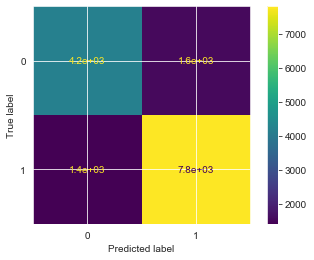

In [34]:
print(plot_confusion_matrix(dtree, X_test, y_test))

In [35]:
print(confusion_matrix(y_test, pred_dt))

[[4199 1586]
 [1412 7803]]


In [36]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5785
           1       0.83      0.85      0.84      9215

    accuracy                           0.80     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.80      0.80      0.80     15000



In [37]:
print(f'F1 Score : {f1_score(y_test, pred_dt)}')
print(f'Precision Score : {precision_score(y_test, pred_dt)}')
print(f'Recall Score : {recall_score(y_test, pred_dt)}')

F1 Score : 0.8388518598150935
Precision Score : 0.8310789221429332
Recall Score : 0.8467715680954965


In [38]:
cross_val_score(dtree, X_test, y_test, cv = 10).mean()

0.8040666666666667

### Random Forest Classifier

In [39]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
pred_rfc = rfc.predict(X_test)
proba_rfc = rfc.predict_proba(X_test)

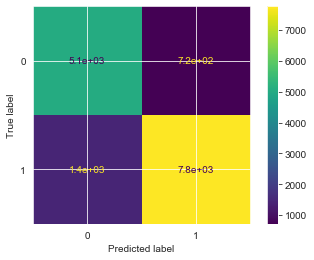

In [42]:
print(plot_confusion_matrix(rfc, X_test, y_test))

In [43]:
print(confusion_matrix(y_test, pred_rfc))

[[5067  718]
 [1443 7772]]


In [44]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.86      0.86     15000



In [45]:
print(f'F1 Score : {f1_score(y_test, pred_rfc)}')
print(f'Precision Score : {precision_score(y_test, pred_rfc)}')
print(f'Recall Score : {recall_score(y_test, pred_rfc)}')

F1 Score : 0.8779440835922055
Precision Score : 0.9154299175500589
Recall Score : 0.8434074877916441


In [46]:
cross_val_score(rfc, X_test, y_test, cv = 10).mean()

0.8519333333333334

### Ada Boost - dtree

In [47]:
ada_dt = AdaBoostClassifier(base_estimator=dtree)

In [48]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [49]:
pred_ada_dt = ada_dt.predict(X_test)
proba_ada_dt = ada_dt.predict_proba(X_test)

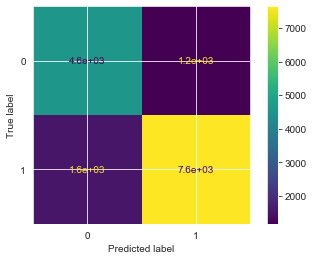

In [50]:
print(plot_confusion_matrix(ada_dt, X_test, y_test))

In [51]:
print(confusion_matrix(y_test, pred_ada_dt))

[[4608 1177]
 [1576 7639]]


In [52]:
print(classification_report(y_test, pred_ada_dt))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      5785
           1       0.87      0.83      0.85      9215

    accuracy                           0.82     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.82      0.82      0.82     15000



In [53]:
print(f'F1 Score : {f1_score(y_test, pred_ada_dt)}')
print(f'Precision Score : {precision_score(y_test, pred_ada_dt)}')
print(f'Recall Score : {recall_score(y_test, pred_ada_dt)}')

F1 Score : 0.8473185070156952
Precision Score : 0.8664927404718693
Recall Score : 0.8289744981009224


In [54]:
cross_val_score(ada_dt, X_test, y_test, cv = 10).mean()

0.8015333333333334

### Gradient Boosting Classifier

In [55]:
gradient = GradientBoostingClassifier()
gradient

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
pred_gradient = gradient.predict(X_test)
proba_gradient = gradient.predict_proba(X_test)

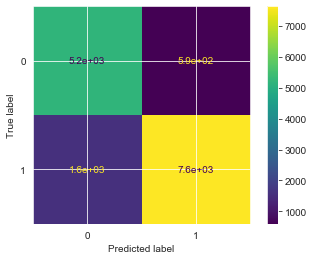

In [58]:
print(plot_confusion_matrix(gradient, X_test, y_test))

In [59]:
print(confusion_matrix(y_test, pred_gradient))

[[5192  593]
 [1577 7638]]


In [60]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5785
           1       0.93      0.83      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.87      0.86      0.86     15000



In [61]:
print(f'F1 Score : {f1_score(y_test, pred_gradient)}')
print(f'Precision Score : {precision_score(y_test, pred_gradient)}')
print(f'Recall Score : {recall_score(y_test, pred_gradient)}')

F1 Score : 0.8756161870915969
Precision Score : 0.9279552909731503
Recall Score : 0.8288659793814434


In [62]:
cross_val_score(gradient, X_test, y_test, cv = 10).mean()

0.8523333333333334

### Eval Metric Summary (No Scale - No SMOTE)

In [63]:
pred_model = [pred_logreg, pred_knn, pred_dt, pred_rfc, pred_ada_dt, pred_gradient]
f1 = []
prec = []
rec = []

for mod in pred_model:
    f1.append(round(f1_score(y_test, mod)*100,2))
    prec.append(round(precision_score(y_test, mod)*100,2))
    rec.append(round(recall_score(y_test, mod)*100,2))
    
print(f1)
print(prec)
print(rec)

[87.06, 77.21, 83.89, 87.79, 84.73, 87.56]
[91.88, 73.14, 83.11, 91.54, 86.65, 92.8]
[82.72, 81.76, 84.68, 84.34, 82.9, 82.89]


In [64]:
mtrc_summary = pd.DataFrame([f1,prec,rec], index=['f1_score', 'precision_score', 'recall_score'],
                           columns=['logistic_reg','knn', 'dtree', 'rfc', 'ada_boost_dt', 'gradient_boost'])
mtrc_summary =mtrc_summary.T
mtrc_summary.sort_values('f1_score', ascending=False)

,f1_score,precision_score,recall_score
rfc,87.79,91.54,84.34
gradient_boost,87.56,92.80,82.89
logistic_reg,87.06,91.88,82.72
ada_boost_dt,84.73,86.65,82.90
dtree,83.89,83.11,84.68
knn,77.21,73.14,81.76


#### 3 Best Model
1. Random Forest Classifier
2. Gradient Boost Classifier
3. Logistic Regression


## ROC AUC - No Standardize - No SMOTE

In [65]:
prob_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

prob_gradient = proba_gradient[:,1]
fpr_gradient, tpr_gradient, threshold_gradient = roc_curve(y_test, prob_gradient)
roc_auc_gradient = auc(fpr_gradient, tpr_gradient)

prob_logreg = proba_logreg[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

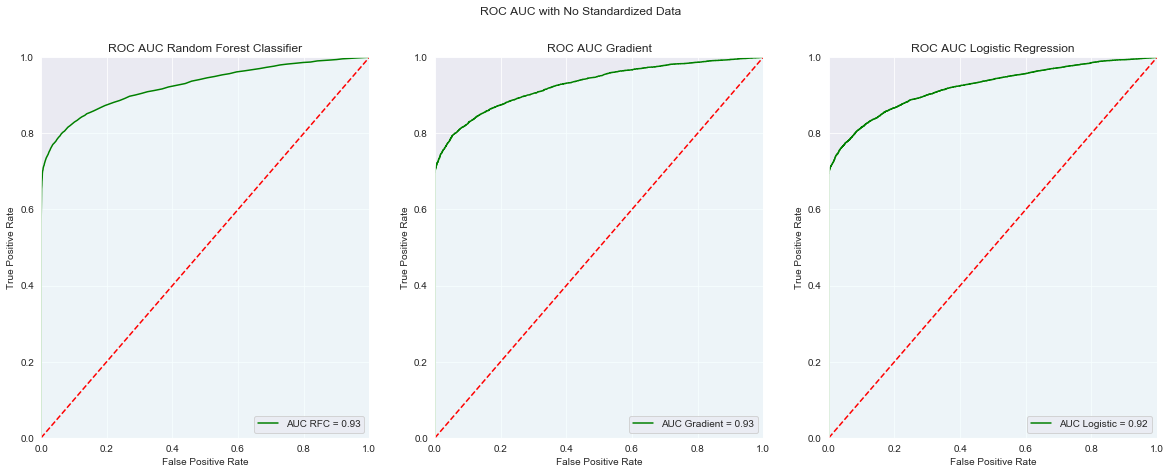

In [66]:
plt.figure(figsize=(20,7))
plt.suptitle('ROC AUC with No Standardized Data')

plt.subplot(131)
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Gradient')
plt.plot(fpr_gradient, tpr_gradient, 'green', label='AUC Gradient = {}'.format(round(roc_auc_gradient,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient,tpr_gradient, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'green', label='AUC Logistic = {}'.format(round(roc_auc_logreg,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg,tpr_logreg, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

In [67]:
print(round(auc(fpr_rfc, tpr_rfc),2))
print(round(auc(fpr_gradient, tpr_gradient),2))
print(round(auc(fpr_logreg, tpr_logreg),2))

0.93
0.93
0.92


# Data with outliers - Standardize - No SMOTE

In [68]:
scaler = StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
scaled_features = scaler.fit_transform(features.drop('enrolled',axis=1))
scaled_features

array([[-0.01469505, -1.41936322, -0.80757165, ..., -0.14285714,
        -0.09783011, -0.06571583],
       [ 1.4617    , -1.55380801, -0.7150065 , ..., -0.14285714,
        -0.09783011, -0.06571583],
       [-0.99895842,  0.8661982 , -0.80757165, ..., -0.14285714,
        -0.09783011, -0.06571583],
       ...,
       [-0.50682673,  1.26953257,  0.67347067, ..., -0.14285714,
        -0.09783011, -0.06571583],
       [ 1.4617    , -0.07491533, -0.43731107, ..., -0.14285714,
        -0.09783011, -0.06571583],
       [ 0.47743663, -1.55380801, -0.62244136, ..., -0.14285714,
        -0.09783011, -0.06571583]])

In [70]:
scaled_data = pd.DataFrame(scaled_features, columns=features.columns.drop('enrolled'))
scaled_data

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,about,accountview,addproperty,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,-0.014695,-1.419363,-0.807572,-0.387567,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716
1,1.461700,-1.553808,-0.715007,-0.514723,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716
2,-0.998958,0.866198,-0.807572,-1.150505,-0.347635,2.193918,2.249579,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,-1.050472,-0.870185,-0.827839,-0.142857,-0.09783,-0.065716
3,0.477437,0.462864,-0.344746,1.201889,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,1.149181,-0.827839,-0.142857,-0.09783,-0.065716
4,-0.998958,0.731753,-0.067050,0.693263,-0.347635,-0.455805,2.249579,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,1.149181,1.207964,-0.142857,-0.09783,-0.065716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.014695,0.059529,0.025515,-0.514723,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,1.149181,-0.827839,-0.142857,-0.09783,-0.065716
49996,-0.998958,-1.688253,0.303210,-1.086927,-0.347635,2.193918,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,-1.050472,-0.870185,-0.827839,-0.142857,-0.09783,-0.065716
49997,-0.506827,1.269533,0.673471,0.248216,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716
49998,1.461700,-0.074915,-0.437311,0.311794,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.21192,-0.20787,-0.158013,-0.238592,0.951953,1.149181,1.207964,-0.142857,-0.09783,-0.065716


In [71]:
target = pd.DataFrame(features['enrolled'])
target

,enrolled
0,0
1,0
2,0
3,1
4,1
...,...
49995,1
49996,0
49997,0
49998,1


In [72]:
scaled_data = pd.concat([scaled_data, target],axis=1)
scaled_data

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,about,accountview,addproperty,...,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork,enrolled
0,-0.014695,-1.419363,-0.807572,-0.387567,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716,0
1,1.461700,-1.553808,-0.715007,-0.514723,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716,0
2,-0.998958,0.866198,-0.807572,-1.150505,-0.347635,2.193918,2.249579,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,-1.050472,-0.870185,-0.827839,-0.142857,-0.09783,-0.065716,0
3,0.477437,0.462864,-0.344746,1.201889,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,1.149181,-0.827839,-0.142857,-0.09783,-0.065716,1
4,-0.998958,0.731753,-0.067050,0.693263,-0.347635,-0.455805,2.249579,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,1.149181,1.207964,-0.142857,-0.09783,-0.065716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.014695,0.059529,0.025515,-0.514723,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,1.149181,-0.827839,-0.142857,-0.09783,-0.065716,1
49996,-0.998958,-1.688253,0.303210,-1.086927,-0.347635,2.193918,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,-1.050472,-0.870185,-0.827839,-0.142857,-0.09783,-0.065716,0
49997,-0.506827,1.269533,0.673471,0.248216,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,-0.870185,1.207964,-0.142857,-0.09783,-0.065716,0
49998,1.461700,-0.074915,-0.437311,0.311794,-0.347635,-0.455805,-0.444528,-0.105753,-0.164091,-0.008945,...,-0.20787,-0.158013,-0.238592,0.951953,1.149181,1.207964,-0.142857,-0.09783,-0.065716,1


## Train Test Split Scaled Data

In [73]:
Xsc = scaled_data.drop('enrolled',axis=1)
ysc = scaled_data['enrolled']

In [74]:
Xsc_train, Xsc_test, ysc_train, ysc_test = train_test_split(Xsc, ysc, test_size=.3, random_state=42)

In [75]:
ysc_train.value_counts()

1    21859
0    13141
Name: enrolled, dtype: int64

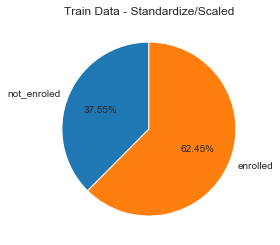

In [76]:
sizes_sc = [len(ysc_train[ysc_train==0]), len(ysc_train[ysc_train==1])]
labels_sc = ['not_enroled', 'enrolled']


plt.title('Train Data - Standardize/Scaled')
plt.pie(sizes_sc, labels=labels_sc, autopct='%2.2f%%', startangle=90)

plt.show()

## Modelling Scaled Data

### Random Forest Classifier

In [77]:
rfc_sc = RandomForestClassifier()

In [78]:
rfc_sc.fit(Xsc_train, ysc_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
pred_rfc_sc = rfc_sc.predict(Xsc_test)
proba_rfc_sc = rfc_sc.predict_proba(Xsc_test)

In [80]:
print('Scaled')
print(confusion_matrix(ysc_test, pred_rfc_sc))
print()
print('No Scaled')
print(confusion_matrix(y_test, pred_rfc))

Scaled
[[5078  707]
 [1451 7764]]

No Scaled
[[5067  718]
 [1443 7772]]


In [81]:
print('Scaled')
print(classification_report(ysc_test, pred_rfc_sc))
print()
print('No Scaled')
print(classification_report(y_test, pred_rfc))

Scaled
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.86      0.86     15000


No Scaled
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.86      0.86     15000



### Gradient Boosting Classifier

In [82]:
gradient_sc = GradientBoostingClassifier()

In [83]:
gradient_sc.fit(Xsc_train,ysc_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
pred_gradient_sc = gradient_sc.predict(Xsc_test)
proba_gradient_sc = gradient_sc.predict_proba(Xsc_test)

In [85]:
print('Scaled')
print(confusion_matrix(ysc_test, pred_gradient_sc))
print()
print('No Scaled')
print(confusion_matrix(y_test, pred_gradient))

Scaled
[[5192  593]
 [1577 7638]]

No Scaled
[[5192  593]
 [1577 7638]]


In [86]:
print('Scaled')
print(classification_report(ysc_test, pred_gradient_sc))
print()
print('No Scaled')
print(classification_report(y_test, pred_gradient))

Scaled
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5785
           1       0.93      0.83      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.87      0.86      0.86     15000


No Scaled
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5785
           1       0.93      0.83      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.87      0.86      0.86     15000



### Logistic Regression

In [87]:
logreg_sc = LogisticRegression()

In [88]:
logreg_sc.fit(Xsc_train, ysc_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pred_logreg_sc = logreg_sc.predict(Xsc_test)
proba_logreg_sc = logreg_sc.predict_proba(Xsc_test)

In [90]:
print('Scaled')
print(confusion_matrix(ysc_test, pred_logreg_sc))
print()
print('No Scaled')
print(confusion_matrix(y_test, pred_logreg))

Scaled
[[5097  688]
 [1582 7633]]

No Scaled
[[5111  674]
 [1592 7623]]


In [91]:
print('Scaled')
print(classification_report(ysc_test, pred_logreg_sc))
print()
print('No Scaled')
print(classification_report(y_test, pred_logreg))

Scaled
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5785
           1       0.92      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.85      0.84     15000
weighted avg       0.86      0.85      0.85     15000


No Scaled
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5785
           1       0.92      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.86      0.84     15000
weighted avg       0.86      0.85      0.85     15000



In [92]:
pred_model_sc = [pred_rfc_sc, pred_gradient_sc, pred_logreg_sc]
f1_sc = []
prec_sc = []
rec_sc = []

for mod_sc in pred_model_sc:
    f1_sc.append(round(f1_score(y_test, mod_sc)*100,2))
    prec_sc.append(round(precision_score(y_test, mod_sc)*100,2))
    rec_sc.append(round(recall_score(y_test, mod_sc)*100,2))
    
print(f1_sc)
print(prec_sc)
print(rec_sc)

[87.8, 87.56, 87.06]
[91.65, 92.8, 91.73]
[84.25, 82.89, 82.83]


In [93]:
mtrc_sc_summary = pd.DataFrame([f1_sc,prec_sc,rec_sc], index=['f1_score', 'precision_score', 'recall_score'],
                           columns=['rfc','gradient_boost','logistic_reg'])
mtrc_sc_summary =mtrc_sc_summary.T
mtrc_sc_summary

,f1_score,precision_score,recall_score
rfc,87.80,91.65,84.25
gradient_boost,87.56,92.80,82.89
logistic_reg,87.06,91.73,82.83


## ROC AUC Standardize - No SMOTE

In [94]:
prob_rfc_sc = proba_rfc_sc[:,1]
fpr_rfc_sc, tpr_rfc_sc, threshold_rfc_sc = roc_curve(y_test, prob_rfc_sc)
roc_auc_rfc_sc = auc(fpr_rfc_sc, tpr_rfc_sc)

prob_gradient_sc = proba_gradient_sc[:,1]
fpr_gradient_sc, tpr_gradient_sc, threshold_gradient_sc = roc_curve(y_test, prob_gradient_sc)
roc_auc_gradient_sc = auc(fpr_gradient_sc, tpr_gradient_sc)

prob_logreg_sc = proba_logreg_sc[:,1]
fpr_logreg_sc, tpr_logreg_sc, threshold_logreg_sc = roc_curve(y_test, prob_logreg_sc)
roc_auc_logreg_sc = auc(fpr_logreg_sc, tpr_logreg_sc)

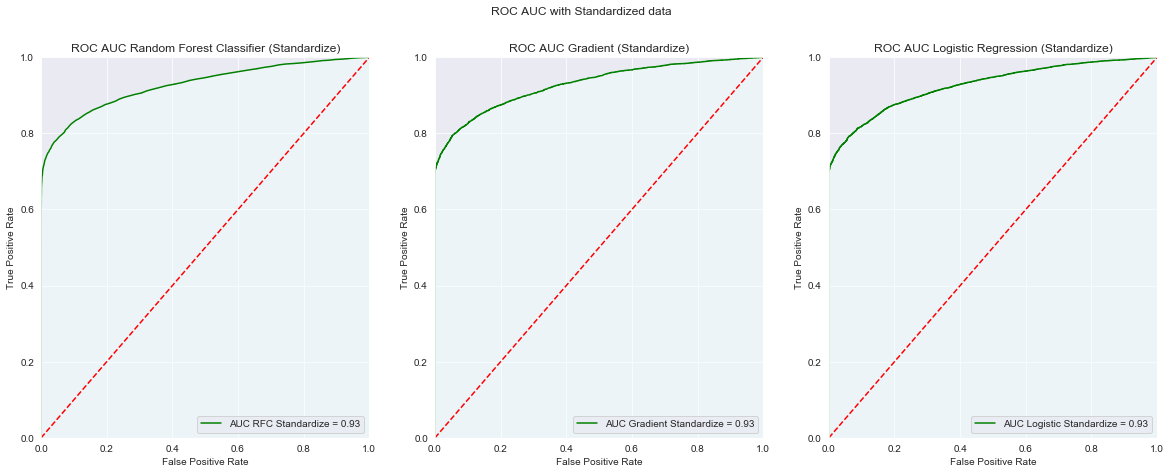

In [95]:
plt.figure(figsize=(20,7))
plt.suptitle('ROC AUC with Standardized data')

plt.subplot(131)
plt.title('ROC AUC Random Forest Classifier (Standardize)')
plt.plot(fpr_rfc_sc, tpr_rfc_sc, 'green', label='AUC RFC Standardize = {}'.format(round(roc_auc_rfc_sc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc_sc,tpr_rfc_sc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Gradient (Standardize)')
plt.plot(fpr_gradient_sc, tpr_gradient_sc, 'green', label='AUC Gradient Standardize = {}'.format(round(roc_auc_gradient_sc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient_sc,tpr_gradient_sc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Logistic Regression (Standardize)')
plt.plot(fpr_logreg_sc, tpr_logreg_sc, 'green', label='AUC Logistic Standardize = {}'.format(round(roc_auc_logreg_sc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg_sc,tpr_logreg_sc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.show()

In [96]:
print(round(auc(fpr_rfc_sc, tpr_rfc_sc),2))
print(round(auc(fpr_gradient_sc, tpr_gradient_sc),2))
print(round(auc(fpr_logreg_sc, tpr_logreg_sc),2))

0.93
0.93
0.93


## Eval Metrics Summary (scale vs no scale)

In [97]:
mtrc_sc_summary = mtrc_sc_summary.reset_index()
mtrc_sc_summary.rename(columns={'index':'model'},inplace=True)

In [98]:
mtrc_sc_summary['scale'] = 'yes'

In [99]:
mtrc_sc_summary

,model,f1_score,precision_score,recall_score,scale
0,rfc,87.80,91.65,84.25,yes
1,gradient_boost,87.56,92.80,82.89,yes
2,logistic_reg,87.06,91.73,82.83,yes


In [100]:
#top 3 f1 score model not scaled_data
model_not_sc = mtrc_summary.sort_values('f1_score',ascending=False).iloc[:3,:]

In [101]:
model_not_sc = model_not_sc.reset_index()
model_not_sc.rename(columns={'index':'model'},inplace=True)

In [102]:
model_not_sc['scale'] = 'no'

In [103]:
model_not_sc

,model,f1_score,precision_score,recall_score,scale
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no


In [104]:
# ALL Model
eval_all = pd.concat([model_not_sc,mtrc_sc_summary],axis=0)
eval_all = eval_all.reset_index()
eval_all.drop('index',axis=1, inplace=True)

In [105]:
eval_all

,model,f1_score,precision_score,recall_score,scale
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no
3,rfc,87.80,91.65,84.25,yes
4,gradient_boost,87.56,92.80,82.89,yes
5,logistic_reg,87.06,91.73,82.83,yes


In [106]:
by_scale = eval_all.groupby(['scale','model']).sum()
by_scale

f1_score  precision_score  recall_score
scale model                                                  
no    gradient_boost     87.56            92.80         82.89
      logistic_reg       87.06            91.88         82.72
      rfc                87.79            91.54         84.34
yes   gradient_boost     87.56            92.80         82.89
      logistic_reg       87.06            91.73         82.83
      rfc                87.80            91.65         84.25

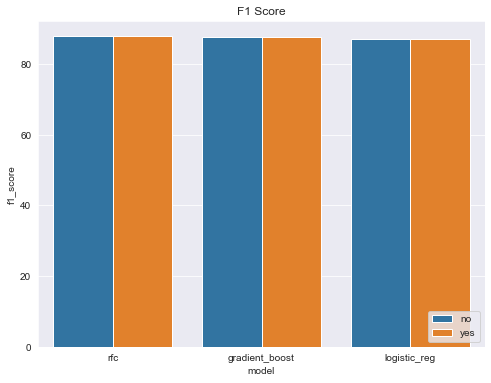

In [107]:
plt.figure(figsize=(8,6))


plt.title('F1 Score')
sns.barplot('model', 'f1_score', hue='scale', data=eval_all)
plt.legend(loc='lower right')

Setelah dilakakukan Scaling. ternyata skorny F1 satu tidak berubah semasekali. skor f1 terbaik dimiliki oleh model Random Forest
#### Kesimpulannya untuk Proses tahap selanjutnya tidak perlu menggunakan Standardize / StandardScaler
#### No-Scale WIN

## SMOTE

In [108]:
# We will use scaled data. coz SMOTE has n_neighbors wich is an KNN algorithm. so we will use scaled train dataset

In [109]:
sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
sm

SMOTE(k_neighbors=5, n_jobs=None, random_state=42, sampling_strategy=1.0)

In [110]:
Xsmot_train, ysmot_train = sm.fit_sample(Xsc_train, ysc_train)

In [111]:
ysmot_train.value_counts()

1    21859
0    21859
Name: enrolled, dtype: int64

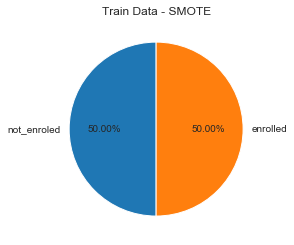

In [112]:
sizes_smot = [len(ysmot_train[ysmot_train==0]), len(ysmot_train[ysmot_train==1])]
labels_smot = ['not_enroled', 'enrolled']


plt.title('Train Data - SMOTE')
plt.pie(sizes_smot, labels=labels_smot, autopct='%2.2f%%', startangle=90)

plt.show()

### Modelling using SMOTE train dataset

### Random Forest Classifier - SMOTE

In [113]:
rfc_smot = RandomForestClassifier()

In [114]:
rfc_smot.fit(Xsmot_train, ysmot_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
pred_rfc_smot = rfc_smot.predict(X_test)
proba_rfc_smot = rfc_smot.predict_proba(X_test)

In [116]:
print('SMOTE')
print(confusion_matrix(y_test, pred_rfc_smot))
print()
print('No SMOTE')
print(confusion_matrix(y_test, pred_rfc))

SMOTE
[[5785    0]
 [4222 4993]]

No SMOTE
[[5067  718]
 [1443 7772]]


In [117]:
print('SMOTE')
print(classification_report(y_test, pred_rfc_smot))
print()
print('No SMOTE')
print(classification_report(y_test, pred_rfc))

SMOTE
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      5785
           1       1.00      0.54      0.70      9215

    accuracy                           0.72     15000
   macro avg       0.79      0.77      0.72     15000
weighted avg       0.84      0.72      0.71     15000


No SMOTE
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.86      0.86     15000



### Gradient Boosting Classifier - SMOTE

In [118]:
gradient_smot = GradientBoostingClassifier()

In [119]:
gradient_smot.fit(Xsmot_train,ysmot_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
pred_gradient_smot = gradient_smot.predict(X_test)
proba_gradient_smot = gradient_smot.predict_proba(X_test)

In [121]:
print('SMOTE')
print(confusion_matrix(y_test, pred_gradient_smot))
print()
print('No SMOTE')
print(confusion_matrix(y_test, pred_gradient))

SMOTE
[[5785    0]
 [2814 6401]]

No SMOTE
[[5192  593]
 [1577 7638]]


In [122]:
print('SMOTE')
print(classification_report(y_test, pred_gradient_smot))
print()
print('No SMOTE')
print(classification_report(y_test, pred_gradient))

SMOTE
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5785
           1       1.00      0.69      0.82      9215

    accuracy                           0.81     15000
   macro avg       0.84      0.85      0.81     15000
weighted avg       0.87      0.81      0.81     15000


No SMOTE
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5785
           1       0.93      0.83      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.87      0.86      0.86     15000



### Logistic Regression - SMOTE

In [123]:
logreg_smot = LogisticRegression()

In [124]:
logreg_smot.fit(Xsmot_train,ysmot_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
pred_logreg_smot = logreg_smot.predict(X_test)
proba_logreg_smot = logreg_smot.predict_proba(X_test)

In [126]:
print('SMOTE')
print(confusion_matrix(y_test, pred_logreg_smot))
print()
print('No SMOTE')
print(confusion_matrix(y_test, pred_logreg))

SMOTE
[[   0 5785]
 [   0 9215]]

No SMOTE
[[5111  674]
 [1592 7623]]


In [127]:
print('SMOTE')
print(classification_report(y_test, pred_logreg_smot))
print()
print('No SMOTE')
print(classification_report(y_test, pred_logreg))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SMOTE
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5785
           1       0.61      1.00      0.76      9215

    accuracy                           0.61     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.38      0.61      0.47     15000


No SMOTE
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5785
           1       0.92      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.86      0.84     15000
weighted avg       0.86      0.85      0.85     15000



## Eval Metrics Summary (SMOTE vs No SMOTE)

In [128]:
# Summary SMOTE
pred_model_smot = [pred_rfc_smot, pred_gradient_smot, pred_logreg_smot]
f1_smot = []
prec_smot = []
rec_smot = []

for mod_smot in pred_model_smot:
    f1_smot.append(round(f1_score(y_test, mod_smot)*100,2))
    prec_smot.append(round(precision_score(y_test, mod_smot)*100,2))
    rec_smot.append(round(recall_score(y_test, mod_smot)*100,2))
    
print(f1_smot)
print(prec_smot)
print(rec_smot)

[70.28, 81.98, 76.11]
[100.0, 100.0, 61.43]
[54.18, 69.46, 100.0]


In [129]:
mtrc_smot_summary = pd.DataFrame([f1_smot,prec_smot,rec_smot], index=['f1_score', 'precision_score', 'recall_score'],
                           columns=['rfc','gradient_boost','logistic_reg'])
mtrc_smot_summary =mtrc_smot_summary.T
mtrc_smot_summary

,f1_score,precision_score,recall_score
rfc,70.28,100.00,54.18
gradient_boost,81.98,100.00,69.46
logistic_reg,76.11,61.43,100.00


In [130]:
mtrc_smot_summary = mtrc_smot_summary.reset_index()
mtrc_smot_summary.rename(columns={'index':'model'},inplace=True)

In [131]:
mtrc_smot_summary['smote'] = 'yes'

In [132]:
mtrc_smot_summary

,model,f1_score,precision_score,recall_score,smote
0,rfc,70.28,100.00,54.18,yes
1,gradient_boost,81.98,100.00,69.46,yes
2,logistic_reg,76.11,61.43,100.00,yes


In [133]:
model_not_smot = mtrc_summary.sort_values('f1_score',ascending=False).iloc[:3,:]
model_not_smot = model_not_smot.reset_index()
model_not_smot.rename(columns={'index':'model'},inplace=True)

In [134]:
model_not_smot['smote'] = 'no'

In [135]:
model_not_smot

,model,f1_score,precision_score,recall_score,smote
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no


In [136]:
# Concat to see Comparasion
eval_all_smot = pd.concat([model_not_smot,mtrc_smot_summary],axis=0)
eval_all_smot = eval_all_smot.reset_index()
eval_all_smot.drop('index',axis=1, inplace=True)

In [137]:
eval_all_smot

,model,f1_score,precision_score,recall_score,smote
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no
3,rfc,70.28,100.00,54.18,yes
4,gradient_boost,81.98,100.00,69.46,yes
5,logistic_reg,76.11,61.43,100.00,yes


In [138]:
by_smot = eval_all_smot.groupby(['smote','model']).sum()
by_smot

f1_score  precision_score  recall_score
smote model                                                  
no    gradient_boost     87.56            92.80         82.89
      logistic_reg       87.06            91.88         82.72
      rfc                87.79            91.54         84.34
yes   gradient_boost     81.98           100.00         69.46
      logistic_reg       76.11            61.43        100.00
      rfc                70.28           100.00         54.18

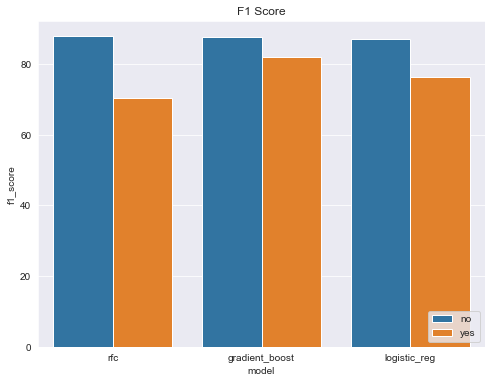

In [139]:
plt.figure(figsize=(8,6))


plt.title('F1 Score')
sns.barplot('model', 'f1_score', hue='smote', data=eval_all_smot)
plt.legend(loc='lower right')

Setelah dilakakukan SMOTE. ternyata skorny F1 SMOTE mengalami penurunan jika dibanding dengan tidak di SMOTE. Random Forest Non SMOTE punya f1 score terbaik, yaitu 87.81
#### Kesimpulannya untuk Proses tahap selanjutnya tidak perlu menggunakan SMOTE

## Hyperparameter Tuning - RandomizedSearchCV

For Hyper Parameter Tuning we'll use training set data (without standardized & SMOTE) instead of using scaled_data & SMOTE. coz eval metrics for data (without standardized) shows better result compared to scaled_data & SMOTE

### Random Forest Classifier - Tuning

In [140]:
rfc_cv = RandomForestClassifier()
rfc_cv

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
param_rfc_cv = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,32,2)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
}

rfc_cv_random = RandomizedSearchCV(estimator= rfc_cv,
                              param_distributions= param_rfc_cv,
                              n_iter=10, cv=5, n_jobs=-1, scoring='f1')

In [142]:
rfc_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [143]:
rfc_cv_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'max_depth': 110,
 'criterion': 'entropy',
 'bootstrap': True}

In [144]:
rfc_cv_random.best_estimator_.score(X_train, y_train)

0.9495142857142858

In [145]:
rfc_cv_rand = rfc_cv_random.best_estimator_
rfc_cv_rand

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
pred_rfc_cv = rfc_cv_rand.predict(X_test)
proba_rfc_cv = rfc_cv_rand.predict_proba(X_test)

In [147]:
print('Tuning')
print(confusion_matrix(y_test, pred_rfc_cv))
print()
print('No Tuning')
print(confusion_matrix(y_test, pred_rfc))

Tuning
[[5126  659]
 [1429 7786]]

No Tuning
[[5067  718]
 [1443 7772]]


In [148]:
print('Tuning')
print(classification_report(y_test, pred_rfc_cv))
print()
print('No Tuning')
print(classification_report(y_test, pred_rfc))

Tuning
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.87      0.86     15000
weighted avg       0.87      0.86      0.86     15000


No Tuning
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.86      0.86     15000



### Gradient Boosting Classifier - Tuning

In [149]:
gradient_cv = GradientBoostingClassifier()
gradient_cv

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
param_gradient_cv = {
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,32,2)]    
}

gradient_cv_random = RandomizedSearchCV(estimator= gradient_cv,
                              param_distributions= param_gradient_cv,
                              n_iter=10, cv=5, n_jobs=-1, scoring='f1')

In [151]:
gradient_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [152]:
gradient_cv_random.best_params_

{'n_estimators': 64,
 'min_samples_split': 20,
 'max_depth': 10,
 'learning_rate': 0.05}

In [153]:
gradient_cv_random.best_estimator_.score(X_train, y_train)

0.8853142857142857

In [154]:
gradient_cv_rand = gradient_cv_random.best_estimator_
gradient_cv_rand

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=64,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [155]:
pred_gradient_cv = gradient_cv_rand.predict(X_test)
proba_gradient_cv = gradient_cv_rand.predict_proba(X_test)

In [156]:
print('Tuning')
print(confusion_matrix(y_test, pred_gradient_cv))
print()
print('No Tuning')
print(confusion_matrix(y_test, pred_gradient))

Tuning
[[5145  640]
 [1456 7759]]

No Tuning
[[5192  593]
 [1577 7638]]


In [157]:
print('Tuning')
print(classification_report(y_test, pred_gradient_cv))
print()
print('No Tuning')
print(classification_report(y_test, pred_gradient_cv))

Tuning
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.87      0.86     15000
weighted avg       0.87      0.86      0.86     15000


No Tuning
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      5785
           1       0.92      0.84      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.87      0.86     15000
weighted avg       0.87      0.86      0.86     15000



### Logistic Regression - Tuning

In [158]:
logreg_cv = LogisticRegression()
logreg_cv

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
param_logreg_cv = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2']
} 

logreg_cv_random = RandomizedSearchCV(estimator= logreg_cv,
                              param_distributions= param_logreg_cv,
                              n_iter=10, cv=5, n_jobs=-1, scoring='f1')

In [160]:
logreg_cv_random.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [161]:
logreg_cv_random.best_params_

{'penalty': 'l2', 'C': 2}

In [162]:
logreg_cv_random.best_estimator_.score(X_train, y_train)

0.8438857142857142

In [163]:
logreg_cv_rand = logreg_cv_random.best_estimator_
logreg_cv_rand

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
pred_logreg_cv = logreg_cv_rand.predict(X_test)
proba_logreg_cv = logreg_cv_rand.predict_proba(X_test)

In [165]:
print('Tuning')
print(confusion_matrix(y_test, pred_logreg_cv))
print()
print('No Tuning')
print(confusion_matrix(y_test, pred_logreg))

Tuning
[[5024  761]
 [1555 7660]]

No Tuning
[[5111  674]
 [1592 7623]]


In [166]:
print('Tuning')
print(classification_report(y_test, pred_logreg_cv))
print()
print('No Tuning')
print(classification_report(y_test, pred_logreg_cv))

Tuning
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      5785
           1       0.91      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.85      0.84     15000
weighted avg       0.85      0.85      0.85     15000


No Tuning
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      5785
           1       0.91      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.85      0.84     15000
weighted avg       0.85      0.85      0.85     15000



In [167]:
pred_model_cv = [pred_rfc_cv, pred_gradient_cv, pred_logreg_cv]
f1_cv = []
prec_cv = []
rec_cv = []

for mod_cv in pred_model_sc:
    f1_cv.append(round(f1_score(y_test, mod_cv)*100,2))
    prec_cv.append(round(precision_score(y_test, mod_cv)*100,2))
    rec_cv.append(round(recall_score(y_test, mod_cv)*100,2))

print(f1_cv)
print(prec_cv)
print(rec_cv)

[87.8, 87.56, 87.06]
[91.65, 92.8, 91.73]
[84.25, 82.89, 82.83]


In [168]:
mtrc_cv_summary = pd.DataFrame([f1_cv,prec_cv,rec_cv], index=['f1_score', 'precision_score', 'recall_score'],
                           columns=['rfc','gradient_boost','logistic_reg'])
mtrc_cv_summary = mtrc_cv_summary.T
mtrc_cv_summary

,f1_score,precision_score,recall_score
rfc,87.80,91.65,84.25
gradient_boost,87.56,92.80,82.89
logistic_reg,87.06,91.73,82.83


In [169]:
mtrc_cv_summary = mtrc_cv_summary.reset_index()
mtrc_cv_summary.rename(columns={'index':'model'},inplace=True)

In [170]:
mtrc_cv_summary['tuning'] = 'yes'

In [171]:
mtrc_cv_summary

,model,f1_score,precision_score,recall_score,tuning
0,rfc,87.80,91.65,84.25,yes
1,gradient_boost,87.56,92.80,82.89,yes
2,logistic_reg,87.06,91.73,82.83,yes


In [172]:
# Model with no starndardize & no also no tuning
model_not_sc

,model,f1_score,precision_score,recall_score,scale
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no


In [173]:
# replace scale to tuning. coz in this model we didnt do hyperparameter tuning
model_not_sc.rename(columns={'scale':'tuning'},inplace=True)

In [174]:
model_not_sc

,model,f1_score,precision_score,recall_score,tuning
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no


### Eval Metric Summary (tuning - no tuning)

In [175]:
eval_all_tuning = pd.concat([model_not_sc,mtrc_cv_summary],axis=0)
eval_all_tuning = eval_all_tuning.reset_index()
eval_all_tuning.drop('index',axis=1, inplace=True)

In [176]:
eval_all_tuning

,model,f1_score,precision_score,recall_score,tuning
0,rfc,87.79,91.54,84.34,no
1,gradient_boost,87.56,92.80,82.89,no
2,logistic_reg,87.06,91.88,82.72,no
3,rfc,87.80,91.65,84.25,yes
4,gradient_boost,87.56,92.80,82.89,yes
5,logistic_reg,87.06,91.73,82.83,yes


In [177]:
by_tuning = eval_all_tuning.groupby(['tuning','model']).sum()
by_tuning

f1_score  precision_score  recall_score
tuning model                                                  
no     gradient_boost     87.56            92.80         82.89
       logistic_reg       87.06            91.88         82.72
       rfc                87.79            91.54         84.34
yes    gradient_boost     87.56            92.80         82.89
       logistic_reg       87.06            91.73         82.83
       rfc                87.80            91.65         84.25

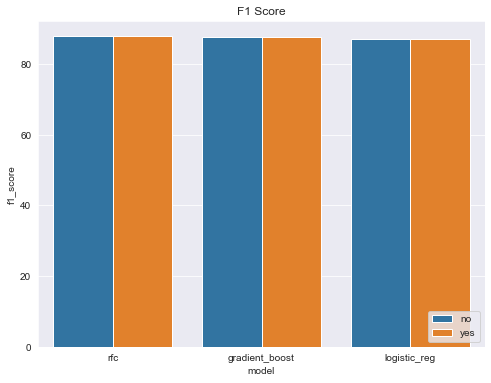

In [178]:
plt.figure(figsize=(8,6))


plt.title('F1 Score')
sns.barplot('model', 'f1_score', hue='tuning', data=eval_all_tuning)
plt.legend(loc='lower right')

Setelah dilakakukan Hyper Parameter Tuning. ternyata skorny F1 satu tidak berubah semasekali. skor f1 terbaik dimiliki oleh model Random Forest
#### Kesimpulannya Tidak perlu menggunakan  Hyper Parameter Tuning

# Kesimpulan Akhir : Tidak perlu menggunakan tools standardize/scaler, SMOTE dan Hyperparameter Tuning